In [1]:
import pandas as pd
from itertools import combinations
import math
import numpy as np
import statistics
from itertools import permutations
from bioinfokit import analys, visuz
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
from matplotlib_venn import venn2
import copy
import random
from vst_function import *
from stattools.resampling import PermutationTest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from pca_plot import *

<h1> GRCh37

In [30]:
anotation = pd.read_csv('../data/SGDP_anotation.csv', sep=',', encoding='latin-1',  index_col=1)

data = pd.read_csv("../call_cnvr_grch37/individual_cnv_cnvr.txt", sep='\t')
data.columns = ['Chromosome', 'Start', 'End','CNVR','Sample_ID','CNV_Start', 'CNV_End', 'RD', 'Lenght']
data = data.dropna()#.describe()

cnv = data.pivot_table(index=["Chromosome", "Start", "End"], 
                    columns='Sample_ID', 
                    values='RD').reset_index()
cnv = cnv.fillna(2)
cnv['Chromosome'] = 'chr' + cnv['Chromosome'].astype(str)
cnv['Start'] = cnv['Start'].astype(int)
cnv['End'] = cnv['Start'].astype(int)
#cnv.to_csv('../data/grch37_cnvr_cnv_values.csv', index=False)
#coordinates = cnv.iloc[:,0:3]
#coordinates.to_csv('../data/grch37_cnvr_coordinates.bed', sep='\t', header=False, index=False)
cnv

Sample_ID,Chromosome,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,...,SS6004471,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477,SS6004478,SS6004479,SS6004480
0,chr1,176101,176101,4.0,2.0,2.0,3.0,3.0,2.333333,3.0,...,3.0,1.0,3.0,1.000000,2.666667,4.0,1.666667,2.0,3.0,3.0
1,chr1,449901,449901,0.0,1.5,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
2,chr1,665601,665601,3.0,4.0,2.0,2.0,2.0,2.000000,2.0,...,4.0,3.0,4.5,3.333333,3.666667,3.0,4.000000,4.5,2.0,2.0
3,chr1,891701,891701,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,0.0,0.0,2.0,2.000000,2.000000,0.0,2.000000,0.0,0.0,0.0
4,chr1,1007801,1007801,0.0,2.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,2.000000,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,chr9,140136301,140136301,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,2.0,2.0,2.0,2.000000,2.000000,2.0,2.000000,2.0,2.0,2.0
7776,chr9,140197201,140197201,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,3.0,2.0,2.0,2.000000,2.000000,2.0,2.000000,2.0,2.0,2.0
7777,chr9,140245301,140245301,0.0,1.0,0.0,0.0,1.0,2.000000,0.0,...,2.0,0.0,2.0,1.000000,1.000000,0.0,2.000000,2.0,0.0,0.0
7778,chr9,140387601,140387601,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,2.5,4.0,2.0,4.000000,2.000000,4.0,2.000000,4.0,2.0,2.0


In [31]:
data_grch37 = cnv.iloc[:,4:284]
data_grch37 = data_grch37.T
data_grch37 = data_grch37.fillna(2)

features = anotation.loc[:,["7-Gender","10-Region", "11-Country",]]
data_grch37 = features.merge(data_grch37, left_index=True, right_index=True)
data_grch37

,7-Gender,10-Region,11-Country,0,1,2,3,4,5,6,...,7770,7771,7772,7773,7774,7775,7776,7777,7778,7779
LP6005443-DNA_B06,F,WestEurasia,Iceland,1.500000,0.0,2.0,2.0,0.0,2.0,2.0,...,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
LP6005442-DNA_D08,F,WestEurasia,Iceland,3.333333,0.0,2.0,2.0,2.0,2.0,2.0,...,2.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
LP6005441-DNA_D07,F,SouthAsia,Pakistan,2.000000,0.0,2.0,2.0,2.0,2.0,2.0,...,2.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
LP6005441-DNA_C07,M,SouthAsia,Pakistan,3.000000,0.0,2.0,2.0,0.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
LP6005442-DNA_G11,M,Africa,SierraLeone,3.333333,0.0,2.0,2.0,2.0,2.0,2.0,...,2.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP6005441-DNA_H10,F,WestEurasia,Russia,2.000000,0.0,2.0,2.0,0.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
LP6005519-DNA_A06,M,EastAsia,Myanmar,2.000000,0.0,2.0,2.0,1.0,2.0,2.0,...,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
LP6005519-DNA_B06,M,EastAsia,Myanmar,2.000000,0.0,2.0,2.0,0.0,2.0,2.0,...,2.0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0
LP6005441-DNA_B08,F,Africa,Congo,2.666667,0.0,2.0,2.0,0.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


<h2> PCA

In [45]:
data_grch37_deletions = data_grch37[(data_grch37[data_grch37.columns[1:]]<3).all(axis=1)]
counts = data_grch37_deletions.T
counts = counts.sort_index()
counts = counts.fillna(2)
counts = counts.sort_index()
counts

,28,29,38,43,66,169,170,171,202,228,...,7556,7603,7612,7645,7647,7653,7752,7753,7758,7765
LP6005441-DNA_A03,2.0,2.0,0.250000,0.0,0.0,2.0,2.0,1.0,0.0,1.0,...,0.0,0.0,2.0,1.500000,0.900000,0.0,2.0,2.0,2.0,2.0
LP6005441-DNA_A04,2.0,2.0,0.666667,0.0,2.0,0.0,0.0,2.0,0.0,1.0,...,2.0,0.0,0.0,0.000000,0.825000,0.0,2.0,1.0,0.0,2.0
LP6005441-DNA_A05,2.0,2.0,0.666667,0.0,0.0,2.0,2.0,2.0,0.0,2.0,...,0.0,2.0,0.0,0.000000,1.086957,0.0,2.0,1.0,1.0,0.0
LP6005441-DNA_A06,2.0,2.0,0.666667,2.0,2.0,2.0,2.0,2.0,0.0,1.0,...,2.0,0.0,2.0,0.800000,1.052632,1.0,1.0,2.0,0.0,2.0
LP6005441-DNA_A08,2.0,2.0,0.000000,0.0,2.0,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,1.500000,1.102564,2.0,2.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS6004476,0.0,2.0,0.666667,0.0,2.0,1.0,2.0,2.0,0.0,0.0,...,2.0,0.0,2.0,0.000000,0.593750,0.0,2.0,0.0,0.0,2.0
SS6004477,2.0,2.0,0.333333,0.0,2.0,2.0,2.0,0.0,0.0,2.0,...,2.0,0.0,1.0,1.500000,0.750000,0.0,2.0,2.0,2.0,2.0
SS6004478,2.0,2.0,0.500000,0.0,0.0,2.0,2.0,2.0,0.0,2.0,...,2.0,0.0,2.0,1.714286,1.333333,0.0,2.0,2.0,0.0,2.0
SS6004479,0.0,2.0,0.666667,2.0,2.0,1.0,2.0,2.0,0.0,1.0,...,2.0,0.0,2.0,0.000000,1.454545,0.0,1.0,1.0,2.0,0.0


In [46]:
features = anotation.merge(counts, left_index=True, right_index=True)
features = features.loc[:,["7-Gender","10-Region", "11-Country",]]
features = features.sort_index()

            7-Gender      11-Country  component_1  component_2  component_3  \
10-Region                                                                     
Oceania            F  PapuaNewGuinea    -0.709493    -4.616401    -3.311394   
America            F        Colombia    -4.139471    -0.249102     4.890480   
WestEurasia        M          France    -0.108159     3.658278    -0.835052   
WestEurasia        M  Italy(Bergamo)     0.288656     3.296369    -1.629714   
Africa             M           Congo     9.418528    -1.873549     2.430562   
...              ...             ...          ...          ...          ...   
America            M          Brazil    -3.505509     0.153816     4.605054   
Oceania            M       Australia     1.065919    -6.576702    -5.682091   
Oceania            U       Australia    -0.925270    -5.736379    -4.360503   
America            F          Mexico    -3.992794    -0.324264     4.696945   
Africa             M           Sudan     7.798048   

/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_9881/2124056540.py:115: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:
/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_9881/2124056540.py:132: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:


Text(0.5, 1.0, 'GRCh37 PCA deletions')

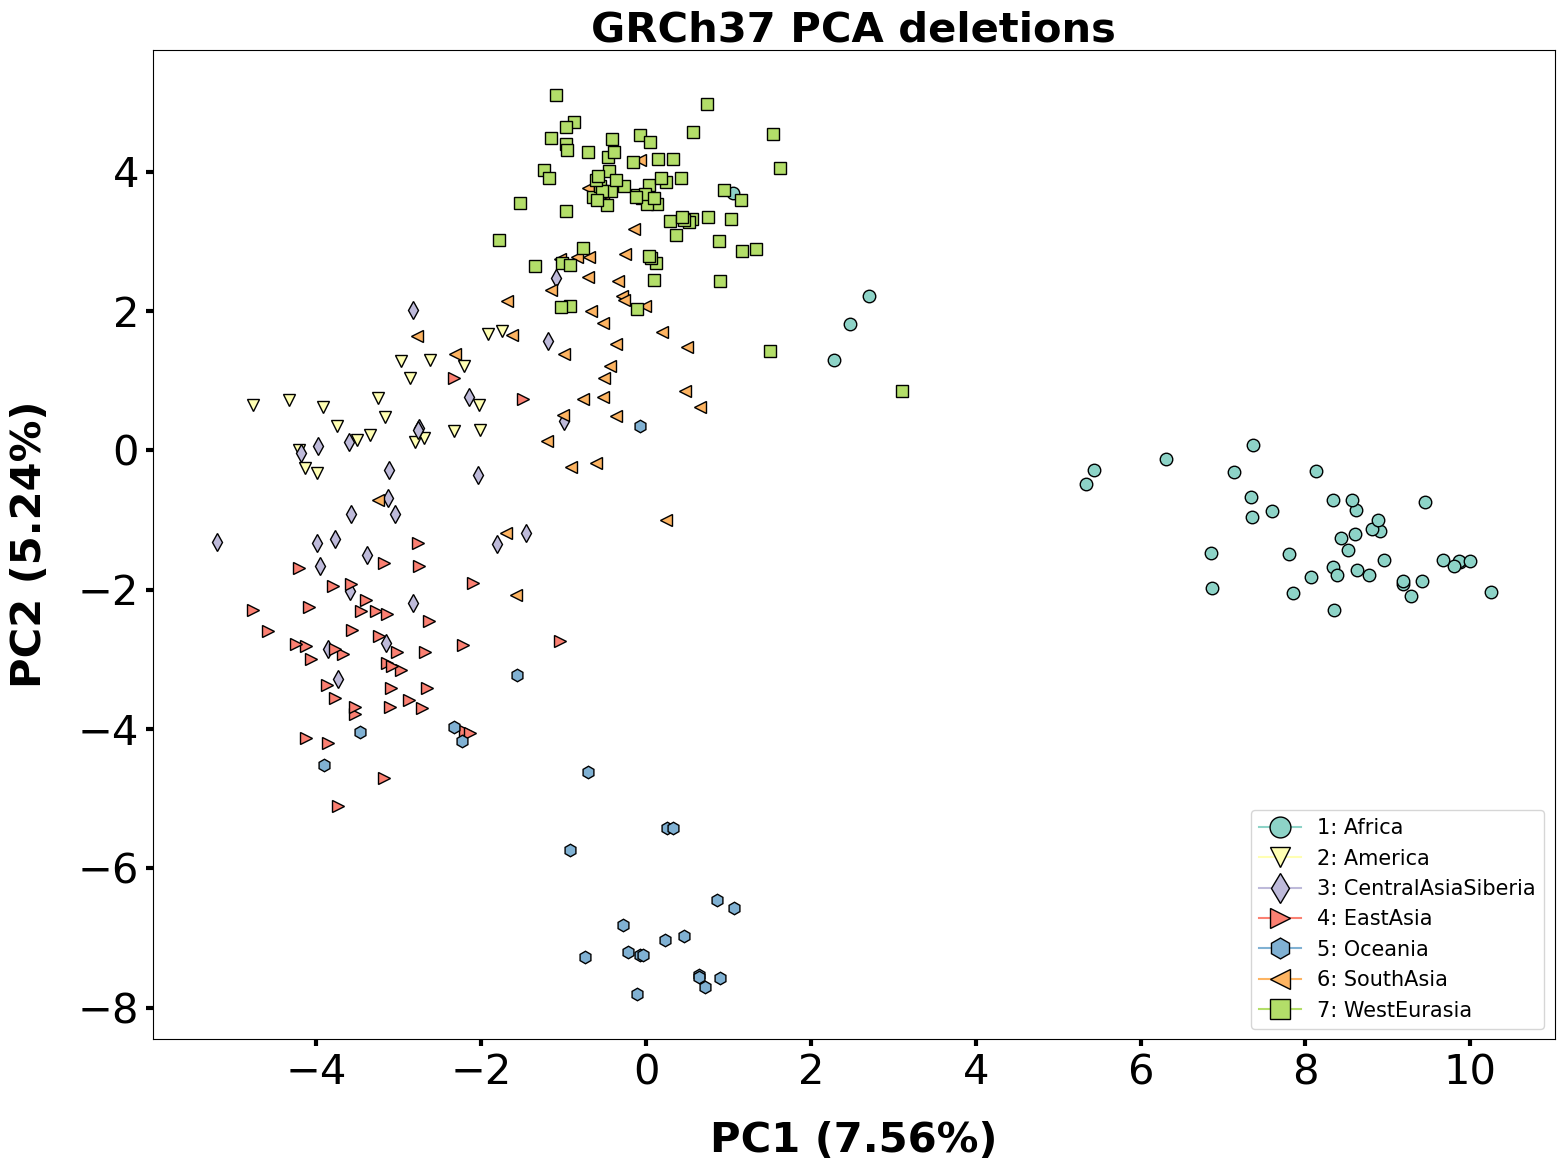

In [51]:
pca = PCA(n_components=10)
pca_results = pca.fit_transform(counts)

df_pca= pd.DataFrame(pca_results,
                          columns=['component_1','component_2', 'component_3', 'component_4',
                                  'component_5',
                                  'component_6',
                                  'component_7',
                                  'component_8',
                                  'component_9',
                                   'component_10'
                                  ],
                          index=features.index)




df_pca = features.merge(df_pca, left_index=True, right_index=True)

components = [1,2,3,4,5,6,7,8,9,10]

combinations_components = list(combinations(components,2))
#for i in combinations_components:
#    plot_scatter_cluster(data=df_pca, abscissa='component_'+str(i[0]), ordinate='component_'+str(i[1]), label_horizontal='PC '+ str(i[0]), label_vertical='PC '+str(i[1]), factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
    #print(str(i[0]))

plot_scatter_cluster_shape(data=df_pca, abscissa='component_1', ordinate='component_2', label_horizontal='PC1 (7.56%)', label_vertical='PC2 (5.24%)', factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
plt.title("GRCh37 PCA deletions", size=30, fontweight="bold")

#plt.savefig('../plots/grch37_pca_deletions_pc12.png', transparent=True)

In [54]:
#Duplications
data_grch37_duplications = data_grch37[(data_grch37[data_grch37.columns[1:]]>1).all(axis=1)]
counts = data_grch37_duplications.T
counts = counts.sort_index()
counts = counts.fillna(2)
counts = counts.sort_index()

            7-Gender      11-Country  component_1  component_2  component_3  \
10-Region                                                                     
Oceania            F  PapuaNewGuinea    -0.486793     1.565714    -2.298543   
America            F        Colombia    -4.380584     1.262330     1.214021   
WestEurasia        M          France    -1.770245    -1.665836     2.104567   
WestEurasia        M  Italy(Bergamo)     1.106233    -1.188542    -0.691248   
Africa             M           Congo     3.907493    -4.422033    -0.897468   
...              ...             ...          ...          ...          ...   
America            M          Brazil    -4.728096     0.629771    -0.517627   
Oceania            M       Australia     2.484188     2.842811     0.600621   
Oceania            U       Australia    -0.304444     0.709211    -0.293514   
America            F          Mexico    -1.323457     0.813234    -1.701333   
Africa             M           Sudan    -1.684064   

/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_9881/2124056540.py:115: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:
/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_9881/2124056540.py:132: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:


Text(0.5, 1.0, 'GRCh37 PCA duplications')

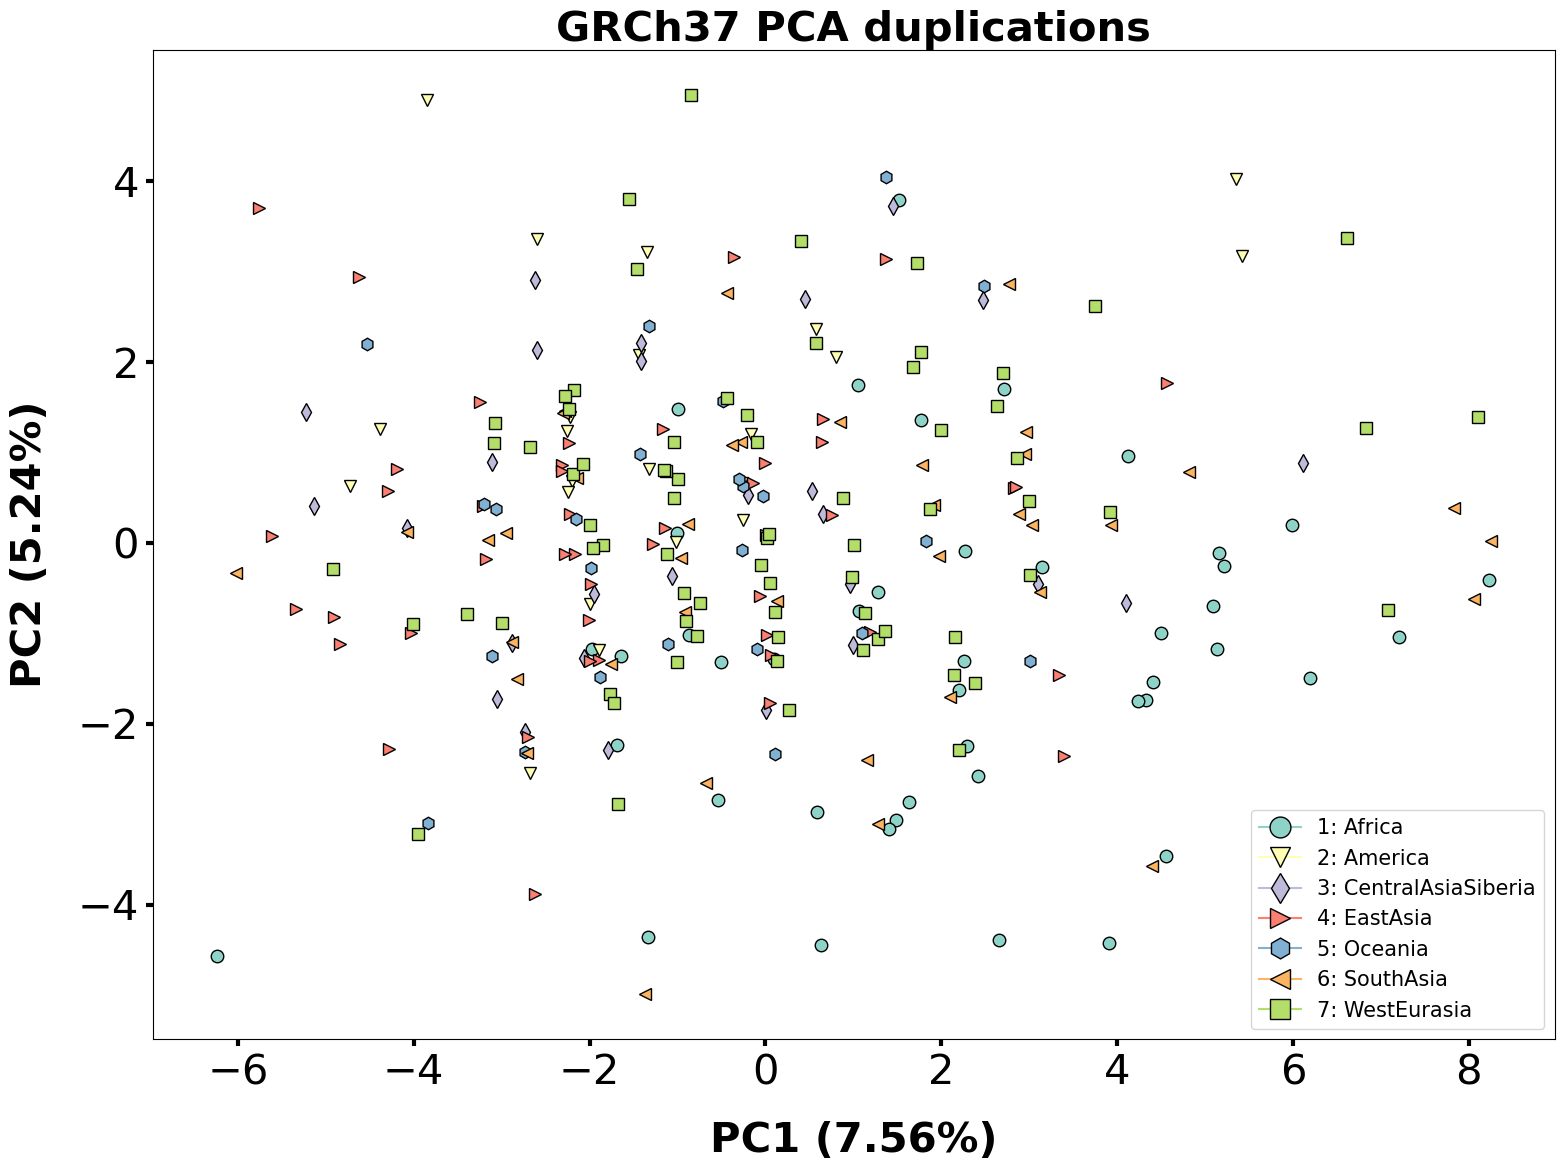

In [55]:
pca = PCA(n_components=10)
pca_results = pca.fit_transform(counts)

df_pca= pd.DataFrame(pca_results,
                          columns=['component_1','component_2', 'component_3', 'component_4',
                                  'component_5',
                                  'component_6',
                                  'component_7',
                                  'component_8',
                                  'component_9',
                                   'component_10'
                                  ],
                          index=features.index)




df_pca = features.merge(df_pca, left_index=True, right_index=True)

components = [1,2,3,4,5,6,7,8,9,10]

combinations_components = list(combinations(components,2))
#for i in combinations_components:
#    plot_scatter_cluster(data=df_pca, abscissa='component_'+str(i[0]), ordinate='component_'+str(i[1]), label_horizontal='PC '+ str(i[0]), label_vertical='PC '+str(i[1]), factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
    #print(str(i[0]))

plot_scatter_cluster_shape(data=df_pca, abscissa='component_1', ordinate='component_2', label_horizontal='PC1 (7.56%)', label_vertical='PC2 (5.24%)', factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
plt.title("GRCh37 PCA duplications", size=30, fontweight="bold")

#plt.savefig('../plots/grch37_pca_deletions_pc12.png', transparent=True)

<h2> Vst 

In [10]:
####### Groupby regions #######
dt_group = data_grch37.groupby('10-Region')

dt_groupped = []
regions = anotation['10-Region'].unique()
regions.sort()
for i in regions:
    dt_groupped.append(dt_group.get_group(str(i)))
    

#### Names to pair-population
regions = data_grch37['10-Region'].unique()
regions.sort()
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])
    

for j in dt_groupped:
    j.drop(columns=['10-Region', '11-Country', '7-Gender'], inplace=True)

/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_9881/1424340435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j.drop(columns=['10-Region', '11-Country', '7-Gender'], inplace=True)
/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_9881/1424340435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j.drop(columns=['10-Region', '11-Country', '7-Gender'], inplace=True)
/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_9881/1424340435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [56]:
## VST for pair-population
vst_dt = []

combination_regions = list(combinations([0,1,2,3,4,5,6],2))
for region in combination_regions:
        statistic = vst_function((dt_groupped[region[0]]), (dt_groupped[region[1]]))
        vst_dt.append(statistic)

vst_dt = pd.DataFrame(vst_dt).set_axis(combination_names)

In [57]:
filtering_vst = pd.DataFrame(vst_dt)>=0.2
filtering_vst = filtering_vst.loc[:, filtering_vst.any()]
#filtering_vst = filtering_vst.set_axis(combination_names)

In [58]:
## Coordinates anotation 
vst_dt = vst_dt.T
vst_dt.insert (0, 'Chromosome', cnv['Chromosome'])
vst_dt.insert (1, 'Start', cnv['Start'])
vst_dt.insert (2, 'End', cnv['End'])
#vst_dt.insert (3, 'Type', cnv['Type'])
vst_dt = vst_dt.round(5)
vst_dt = vst_dt.replace(np.NaN, 0)
#vst_dt.to_csv('../data/vst_results_grch37.csv', index=False)
vst_dt

,Chromosome,Start,End,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,America-CentralAsiaSiberia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,176101,176101,0.00463,0.01545,0.00437,0.06854,0.00300,0.00523,0.00117,...,0.03004,0.12901,0.03077,0.02482,0.03719,0.00019,0.00015,0.04619,0.02640,0.00060
1,chr1,449901,449901,0.00000,0.02328,0.01075,0.02736,0.02676,0.00520,0.01698,...,0.00481,0.00028,0.00023,0.01463,0.00322,0.00394,0.00316,0.00001,0.01350,0.01560
2,chr1,665601,665601,0.01474,0.02858,0.00966,0.04087,0.01054,0.00529,0.00303,...,0.00572,0.15658,0.01947,0.02169,0.09015,0.00012,0.00223,0.11642,0.09313,0.00201
3,chr1,891701,891701,0.00164,0.00496,0.00088,0.00077,0.03324,0.00388,0.01519,...,0.00197,0.01172,0.04514,0.00011,0.00335,0.02864,0.00110,0.05328,0.00760,0.01774
4,chr1,1007801,1007801,0.02565,0.00042,0.00528,0.00714,0.01642,0.00615,0.02757,...,0.00815,0.01245,0.02210,0.00802,0.00016,0.00272,0.00008,0.00147,0.00001,0.00168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,chr9,140136301,140136301,0.00769,0.00176,0.02968,0.00287,0.04227,0.01833,0.01698,...,0.01586,0.00014,0.02636,0.00978,0.01292,0.00372,0.00033,0.02274,0.00804,0.00113
7776,chr9,140197201,140197201,0.00769,0.00877,0.01175,0.00814,0.01081,0.01430,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7777,chr9,140245301,140245301,0.24272,0.20920,0.43720,0.24604,0.35019,0.18928,0.00332,...,0.06365,0.00252,0.02572,0.00140,0.04577,0.00789,0.07203,0.01352,0.00626,0.03516
7778,chr9,140387601,140387601,0.01742,0.01311,0.02784,0.05795,0.01615,0.03492,0.00503,...,0.00815,0.04592,0.00000,0.01057,0.02084,0.01009,0.00140,0.05328,0.01077,0.01359


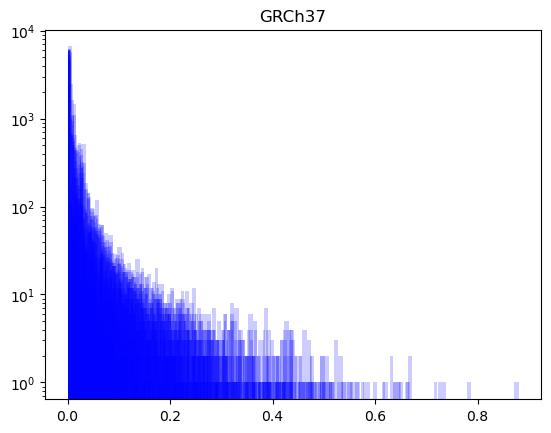

In [59]:
#sns.set_palette("bright")
for i in vst_dt.iloc[:,4:27].columns:
    plt.hist(vst_dt[i], bins=100, alpha=0.2, log=True, color="blue")
    plt.title('GRCh37')
    plt.savefig('../plots/grch37_vst_values_distribution.png.png', transparent=True)

In [60]:
vst_dt_filtering_location = vst_dt.iloc[filtering_vst.columns]
vst_dt_filtering_location#[vst_dt_filtering_location['chr'] == '8'].sort_values(by='WestEurasia-Oceania', ascending=False).head(50)

,Chromosome,Start,End,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,America-CentralAsiaSiberia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
28,chr1,8360201,8360201,0.32161,0.19993,0.00000,0.00000,0.00000,0.00000,0.00956,...,0.20261,0.15949,0.19242,0.22741,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
29,chr1,9846201,9846201,0.27586,0.04239,0.04981,0.02736,0.09376,0.01048,0.12424,...,0.00196,0.01078,0.02217,0.00500,0.01737,0.01359,0.01488,0.04846,0.00036,0.05253
38,chr1,13219701,13219701,0.12209,0.03194,0.00035,0.01716,0.00461,0.03145,0.25941,...,0.03815,0.09418,0.06579,0.10193,0.01286,0.00234,0.02582,0.00593,0.00135,0.01395
43,chr1,16150401,16150401,0.00136,0.01265,0.02431,0.16701,0.07339,0.06031,0.02660,...,0.00097,0.28660,0.13966,0.10306,0.33966,0.18954,0.15444,0.02655,0.02565,0.00035
66,chr1,24377601,24377601,0.00769,0.11063,0.25742,0.66625,0.13524,0.15024,0.10092,...,0.06285,0.38182,0.00497,0.01891,0.14607,0.03831,0.01258,0.30917,0.20186,0.00683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7758,chr9,131183401,131183401,0.08988,0.07894,0.00025,0.00037,0.11241,0.33761,0.00243,...,0.07787,0.07081,0.00267,0.11757,0.00107,0.11122,0.32242,0.09506,0.30464,0.08488
7762,chr9,134074401,134074401,0.24892,0.00807,0.00186,0.06963,0.01037,0.02543,0.17743,...,0.00206,0.03050,0.02831,0.05123,0.04679,0.01793,0.03793,0.09668,0.14224,0.00107
7765,chr9,136453701,136453701,0.26558,0.21090,0.25679,0.01753,0.19511,0.06390,0.00612,...,0.00577,0.10340,0.00031,0.03493,0.13056,0.00897,0.07348,0.08675,0.01170,0.03321
7766,chr9,137097701,137097701,0.00357,0.09135,0.09335,0.42325,0.21517,0.18116,0.05796,...,0.00000,0.20208,0.03162,0.01917,0.19304,0.03398,0.02388,0.08993,0.08715,0.00077


In [16]:
vst_dt_filtered = vst_dt.iloc[filtering_vst.T.index]
vst_dt_filtered.to_csv('vst_candidates_grch37.csv', index=False)
vst_dt_filtered 

,Chromosome,Start,End,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,America-CentralAsiaSiberia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
28,chr1,8360201,8360201,0.32161,0.19993,0.00000,0.00000,0.00000,0.00000,0.00956,...,0.20261,0.15949,0.19242,0.22741,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
29,chr1,9846201,9846201,0.27586,0.04239,0.04981,0.02736,0.09376,0.01048,0.12424,...,0.00196,0.01078,0.02217,0.00500,0.01737,0.01359,0.01488,0.04846,0.00036,0.05253
38,chr1,13219701,13219701,0.12209,0.03194,0.00035,0.01716,0.00461,0.03145,0.25941,...,0.03815,0.09418,0.06579,0.10193,0.01286,0.00234,0.02582,0.00593,0.00135,0.01395
43,chr1,16150401,16150401,0.00136,0.01265,0.02431,0.16701,0.07339,0.06031,0.02660,...,0.00097,0.28660,0.13966,0.10306,0.33966,0.18954,0.15444,0.02655,0.02565,0.00035
66,chr1,24377601,24377601,0.00769,0.11063,0.25742,0.66625,0.13524,0.15024,0.10092,...,0.06285,0.38182,0.00497,0.01891,0.14607,0.03831,0.01258,0.30917,0.20186,0.00683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7758,chr9,131183401,131183401,0.08988,0.07894,0.00025,0.00037,0.11241,0.33761,0.00243,...,0.07787,0.07081,0.00267,0.11757,0.00107,0.11122,0.32242,0.09506,0.30464,0.08488
7762,chr9,134074401,134074401,0.24892,0.00807,0.00186,0.06963,0.01037,0.02543,0.17743,...,0.00206,0.03050,0.02831,0.05123,0.04679,0.01793,0.03793,0.09668,0.14224,0.00107
7765,chr9,136453701,136453701,0.26558,0.21090,0.25679,0.01753,0.19511,0.06390,0.00612,...,0.00577,0.10340,0.00031,0.03493,0.13056,0.00897,0.07348,0.08675,0.01170,0.03321
7766,chr9,137097701,137097701,0.00357,0.09135,0.09335,0.42325,0.21517,0.18116,0.05796,...,0.00000,0.20208,0.03162,0.01917,0.19304,0.03398,0.02388,0.08993,0.08715,0.00077


In [42]:
vst_dt_sb = vst_dt_filtered.drop(columns=['Chromosome', 'Start','End'])
data_grch37 = data_grch37.T.iloc[vst_dt_filtering_location.index]
data_grch37.drop(columns=['7-Gender', '10-Region', '11-Country'], inplace=True)

<h1> T2T-CHM13

In [123]:
chm13 = pd.read_csv('../data/input_t2t_cnv.csv')
#change to df when using telomeres and centromeres filtration
data_chm13 = chm13.pivot_table(index=["Chromosome", "Start", "End"], columns='Sample',  values='CNV_Value', fill_value=2).reset_index()
data_chm13 = data_chm13[(data_chm13[data_chm13.columns[4:]]<5).all(axis=1)]

anotation = pd.read_csv('../data/SGDP_anotation.csv', sep=',', encoding='latin-1')

ids_hg19 = pd.DataFrame()
ids_hg19['Sample'] = anotation['3-Illumina_ID']
ids_hg19['Region'] = anotation['10-Region']

<h2>PCA 

             component_1  component_2
Region                               
Oceania         4.074957   -11.008678
America         6.187909    -8.742958
WestEurasia     6.118867     4.563898
WestEurasia     8.988626     6.191812
Africa          2.331875    11.198188
...                  ...          ...
WestEurasia   -15.512685     5.415484
Africa          0.725499     5.651402
Oceania        -2.929739    -9.646449
Oceania        -1.427995   -16.594023
Africa          3.255384    11.824462

[265 rows x 2 columns]
Count of groups by factor: 7


/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/pca_plot.py:85: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:
/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/pca_plot.py:102: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:


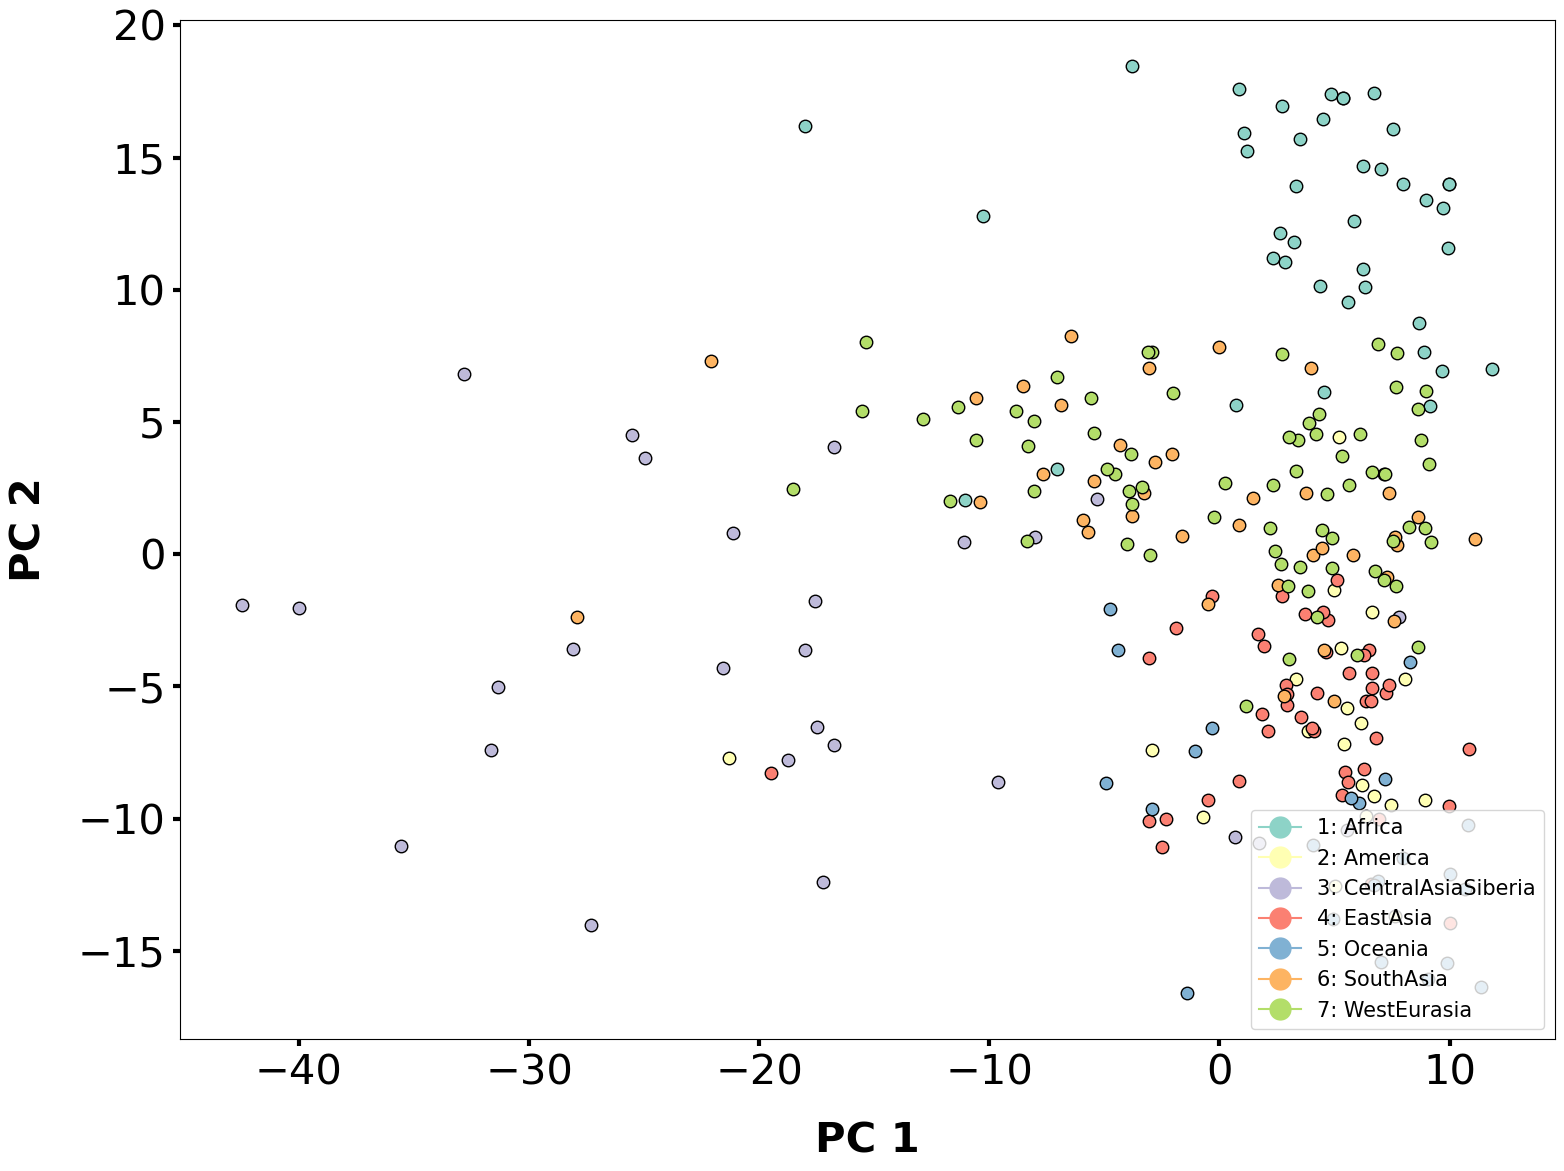

In [154]:
final = data_chm13.iloc[:,4:269]
deletions = final[(final[final.columns[1:]]<3).all(axis=1)]
#deletions = deletions[(deletions[deletions.columns[1:]]>1).all(axis=1)]
counts = deletions
counts = counts.fillna(2)
counts = counts.T
counts = counts.sort_index()
features = ids_hg19.set_index('Sample').merge(counts, left_index=True, right_index=True)
features = features.loc[:,['Region']]
features = features.sort_index()

x = StandardScaler().fit_transform(counts)
pca = PCA(n_components=2)
pca_results = pca.fit_transform(x)

df_pca= pd.DataFrame(pca_results,
                          columns=['component_1','component_2'],
                          index=features.index)


df_pca = features.merge(df_pca, left_index=True, right_index=True)

components = [1,2]

combinations_components = list(combinations(components,2))
for i in combinations_components:
    plot_scatter_cluster(data=df_pca, abscissa='component_'+str(i[0]), ordinate='component_'+str(i[1]), label_horizontal='PC '+ str(i[0]), label_vertical='PC '+str(i[1]), factor='Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)


In [153]:
data_chm13.iloc[:,4:269]

Sample,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,LP6005441-DNA_A10,LP6005441-DNA_A11,LP6005441-DNA_A12,LP6005441-DNA_B01,...,LP6005677-DNA_D03,LP6005677-DNA_E01,LP6005677-DNA_F01,LP6005677-DNA_G01,LP6007068-DNA_A01,LP6007069-DNA_A01,SS6004471,SS6004477,SS6004478,SS6004480
162,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0
163,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
290,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
502,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0
512,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816519,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0
816520,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0
816720,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0
816757,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0


In [138]:
features = ids_hg19.set_index('Sample').merge(counts, left_index=True, right_index=True)
features = features.loc[:,['Region']]
features = features.sort_index()
features 

,Region
Sample,
LP6005441-DNA_A01,WestEurasia
LP6005441-DNA_A03,Oceania
LP6005441-DNA_A04,America
LP6005441-DNA_A05,WestEurasia
LP6005441-DNA_A06,WestEurasia
...,...
LP6007069-DNA_A01,WestEurasia
SS6004471,Africa
SS6004477,Oceania


<h2> Vst 

In [139]:
#coordinates = input_vst.iloc[:,0:2]
cnvs = data_chm13.iloc[:,4:287]
cnvs = cnvs.T
cnvs = cnvs.fillna(2)
dt = features.merge(cnvs, left_index=True, right_index=True)
#dt.drop(columns=['Gender', 'Country'], inplace=True)

In [140]:
####### Groupby regions #######
dt_group = dt.groupby('Region')

dt_groupped = []
regions = features['Region'].unique()
regions.sort()
for i in regions:
    dt_groupped.append(dt_group.get_group(str(i)))
    
#### Names to pair-population
regions = dt['Region'].unique()
regions.sort()
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])

for j in dt_groupped:
    del j['Region']

In [141]:
## VST for pair-population
vst_dt = []

combination_regions = list(combinations([0,1,2,3,4,5,6],2))
for region in combination_regions:
        statistic = vst_function((dt_groupped[region[0]]), (dt_groupped[region[1]]))
        vst_dt.append(statistic)

vst_dt = pd.DataFrame(vst_dt).set_axis(combination_names)

In [142]:
filtering_vst = pd.DataFrame(vst_dt)>=0.2
filtering_vst = filtering_vst.loc[:, filtering_vst.any()]
#filtering_vst = filtering_vst.set_axis(combination_names)
filtering_vst

,162,163,290,502,512,515,536,630,1635,2763,...,816083,816084,816085,816216,816518,816519,816520,816720,816757,818172
Africa-America,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
Africa-CentralAsiaSiberia,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
Africa-EastAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
Africa-Oceania,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Africa-SouthAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Africa-WestEurasia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
America-CentralAsiaSiberia,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,True
America-EastAsia,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,False,False,False,False
America-Oceania,True,False,False,False,True,True,True,False,False,False,...,True,True,False,False,True,True,True,False,False,False
America-SouthAsia,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [143]:
## Coordinates anotation 
vst_dt = vst_dt.T
vst_dt.insert (0, 'Chromosome', data_chm13['Chromosome'])
vst_dt.insert (1, 'Start', data_chm13['Start'])
vst_dt.insert (2, 'End', data_chm13['End'])
#vst_dt.insert (3, 'Type', final_cnv['Type'])
vst_dt = vst_dt.round(5)
vst_dt = vst_dt.replace(np.NaN, 0)
#vst_dt


In [144]:
vst_dt_filtered = vst_dt.loc[filtering_vst.T.index]
vst_dt_filtered#.sort_values(by=['WestEurasia-Oceania'], ascending=False).head(50)
vst_dt_filtered.to_csv('vst_candidates_chm13t2t_cnvs.csv', index=False)
vst_dt_filtered.iloc[:,0:3].to_csv('vst_candidates_chm13t2t_coordinates.bed', sep='\t', header=False, index=False)

data_chm13 = data_chm13.loc[filtering_vst.T.index]
data_chm13.to_csv('../data/t2t_differentiated_cnvs.csv', index=False)

pop =  ids_hg19.set_index('Sample').merge(data_chm13.T, left_index=True, right_index=True)

In [145]:
data_chm13['length'] = data_chm13['End'] -  data_chm13['Start']
data_chm13

Sample,Chromosome,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,...,LP6005677-DNA_E01,LP6005677-DNA_F01,LP6005677-DNA_G01,LP6007068-DNA_A01,LP6007069-DNA_A01,SS6004471,SS6004477,SS6004478,SS6004480,length
162,1,384084,385084,3.0,2.0,3.0,3.0,3.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,1000
163,1,385084,387761,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2677
290,1,636035,637514,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1479
502,1,1093209,1095911,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,2702
512,1,1111010,1112728,3.0,2.0,3.0,2.0,3.0,3.0,3.0,...,3.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0,1718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816519,18,67490802,67493362,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,2560
816520,18,67493362,67495344,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,1982
816720,18,67974136,67983558,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,9422
816757,18,68060461,68075150,2.0,2.0,2.0,2.0,1.0,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,14689


In [146]:
# Gene Anotation
filtering_vst.T.index

Index([   162,    163,    290,    502,    512,    515,    536,    630,   1635,
         2763,
       ...
       816083, 816084, 816085, 816216, 816518, 816519, 816520, 816720, 816757,
       818172],
      dtype='object', length=2577)

In [107]:
## Anotations
t2t_genes = pd.read_csv('../annotation_files/T2T-chm13-catLiftOffGenes.csv')
t2t_genes.columns = ['Chromosome', 'Start', 'End', 'name', 'score', 'strand',
       'thickStart', 'thickEnd', 'reserved', 'blockCount', 'blockSizes',
       'chromStarts', 'name2', 'cdsStartStat', 'cdsEndStat', 'exonFrames',
       'txId', 'type', 'geneName', 'geneType', 'sourceGene',
       'sourceTranscript', 'alignmentId', 'alternativeSourceTranscripts',
       'Paralogy', 'UnfilteredParalogy', 'collapsedGeneIds',
       'collapsedGeneNames', 'frameshift', 'exonAnnotationSupport',
       'intronAnnotationSupport', 'transcriptClass', 'transcriptModes',
       'validStart', 'validStop', 'properOrf', 'extra_paralog']
t2t_genes = t2t_genes[['Chromosome', 'Start', 'End', 'name2']]
t2t_genes = PyRanges(t2t_genes)

t2tchm13_ranges = PyRanges(data_chm13)
#Genes
grch37_coordinates_genes = vst_dt_filtered_ranges.nearest(t2t_genes)
grch37_coordinates_genes = grch37_coordinates_genes.as_df()
grch37_coordinates_genes = grch37_coordinates_genes[grch37_coordinates_genes['Distance'] <1 ]
grch37_coordinates_genes.to_csv('../data/T2T_all_cnvs_genes_differentiated_by_Vst.csv')
grch37_coordinates_genes.columns


/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_9881/3088762937.py:2: DtypeWarning: Columns (23,36) have mixed types. Specify dtype option on import or set low_memory=False.
  t2t_genes = pd.read_csv('../annotation_files/T2T-chm13-catLiftOffGenes.csv')


NameError: name 'PyRanges' is not defined